<a href="https://colab.research.google.com/github/guilhermelaviola/BusinessIntelligenceAndBigDataArchitectureWithAppliedDataScience/blob/main/Class08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descriptive & Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is a fundamental step in data analysis, as it allows for understanding the structure, quality, and patterns of datasets before applying more advanced methods. Through data cleaning and preparation, graphical visualization, correlation analysis, and dimensionality reduction techniques such as PCA, EDA facilitates the identification of trends, relationships between variables, and potential problems in the data. Furthermore, it helps differentiate correlation from causation and supports hypothesis formulation. Applied to different contexts, such as wine analysis or studies on femicides, EDA generates relevant insights that contribute to more informed decisions and more effective analyses.

In [13]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import gdown

## **Example A: Data Science workflow**
The following example is a classic educational example combining EDA, dimensionality reduction, classification, evaluation, and visualization in a BI / Data Science context.

In [14]:
# Downloading the dataset:
!gdown 1Zaclyhh9oYWHDMq3gEHKJRcgB0GD9lT5

# Importing and displaying the DataFrame:
df = pd.read_csv('Wine.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1Zaclyhh9oYWHDMq3gEHKJRcgB0GD9lT5
To: /content/Wine.csv
100% 11.5k/11.5k [00:00<00:00, 28.7MB/s]


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [15]:
# Feature and target separation:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

# Train–test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# StandardScaler is used to standardize the input data in a way that ensures that the data points have a balanced scale,
# which is crucial for machine learning algorithms, especially those that are sensitive to differences in feature scales.
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 2)

# Dimensionality reduction with PCA:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Showing how much variance PC1 and PC2 capture:
explained_variance = pca.explained_variance_ratio_

# Training a Logistic Regression classifier:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

/tmp/ipython-input-2207500341.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


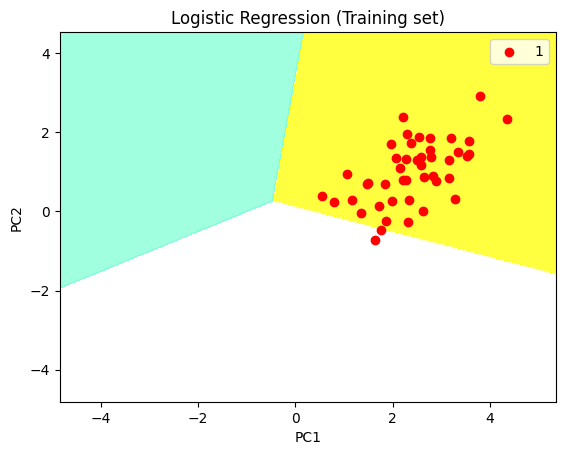

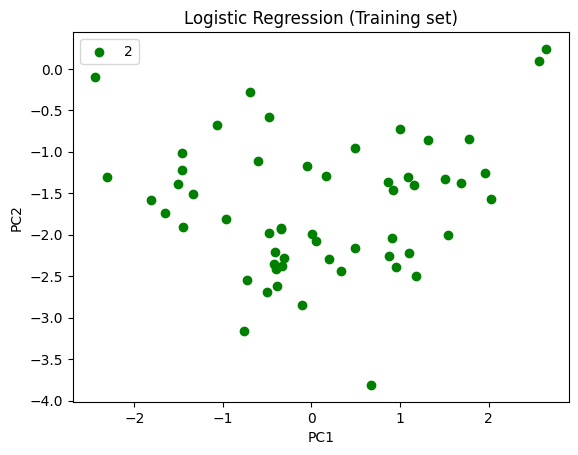

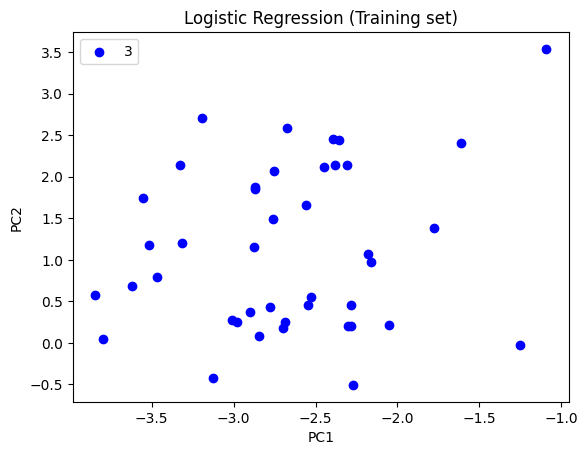

In [10]:
# Predictions and evaluation:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

  plt.title('Logistic Regression (Training set)')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.legend()

  plt.show()

/tmp/ipython-input-2573194167.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


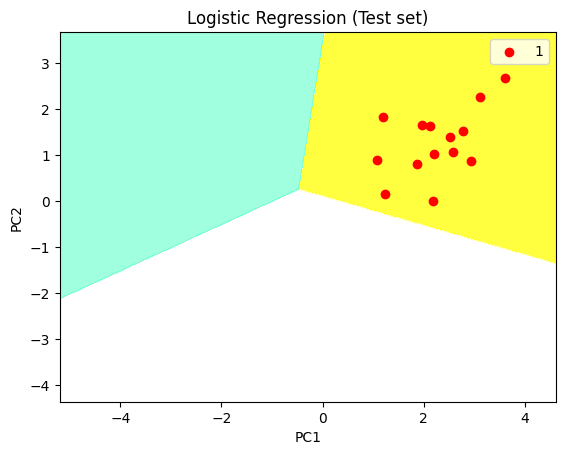

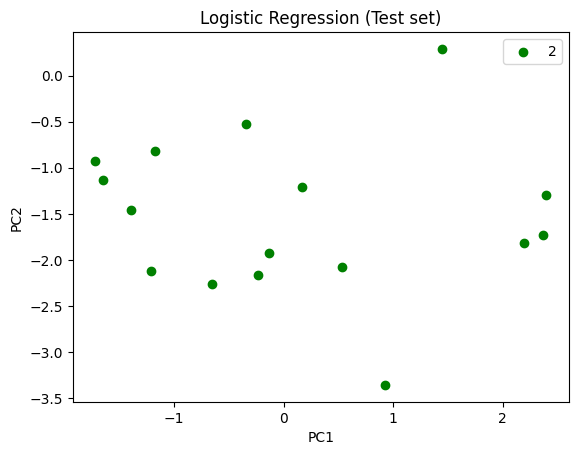

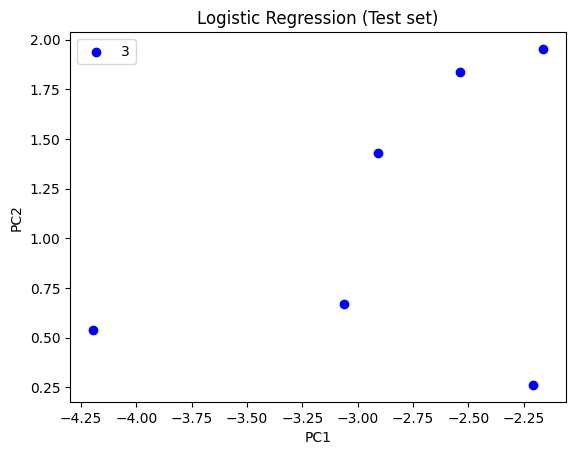

In [11]:
# Visualization of decision boundaries:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

  plt.title('Logistic Regression (Test set)')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.legend()

  plt.show()

In [12]:
# PCA analysis and feature loadings:
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=X.columns)

print(loadings)

                           PC1       PC2       PC3       PC4       PC5  \
Alcohol               0.144329  0.483652 -0.207383 -0.017856 -0.265664   
Malic_Acid           -0.245188  0.224931  0.089013  0.536890  0.035214   
Ash                  -0.002051  0.316069  0.626224 -0.214176 -0.143025   
Ash_Alcanity         -0.239320 -0.010591  0.612080  0.060859  0.066103   
Magnesium             0.141992  0.299634  0.130757 -0.351797  0.727049   
Total_Phenols         0.394661  0.065040  0.146179  0.198068 -0.149318   
Flavanoids            0.422934 -0.003360  0.150682  0.152295 -0.109026   
Nonflavanoid_Phenols -0.298533  0.028779  0.170368 -0.203301 -0.500703   
Proanthocyanins       0.313429  0.039302  0.149454  0.399057  0.136860   
Color_Intensity      -0.088617  0.529996 -0.137306  0.065926 -0.076437   
Hue                   0.296715 -0.279235  0.085222 -0.427771 -0.173615   
OD280                 0.376167 -0.164496  0.166005  0.184121 -0.101161   
Proline               0.286752  0.3649